In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r'C:\Users\sudhe\Documents\AI ML\sales.csv')
df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None


In [6]:
print(df.isnull().sum())

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64


In [7]:
print(df.shape)

(2935849, 6)


In [8]:
df.item_cnt_day.value_counts()

1.0       2629372
2.0        194201
3.0         47350
4.0         19685
5.0         10474
           ...   
251.0           1
501.0           1
112.0           1
164.0           1
2169.0          1
Name: item_cnt_day, Length: 198, dtype: int64

In [9]:
#there are negative values in the data set if we observe
#lets see how many values are negative so that we can come to a desicion that we can remove or change values that are negative

df[df['item_cnt_day']<0].value_counts()


date        date_block_num  shop_id  item_id  item_price  item_cnt_day
01.01.2013  0               18       6724     299.5       -1.0            1
20.10.2013  9               43       7802     299.0       -1.0            1
                                     3336     2499.0      -1.0            1
                                     3331     1199.0      -1.0            1
                            31       9186     299.0       -1.0            1
                                                                         ..
10.04.2013  3               32       3476     1199.0      -1.0            1
                            26       485      300.0       -1.0            1
                            22       7815     4152.0      -1.0            1
                                     5380     2966.0      -1.0            1
31.12.2014  23              54       1865     2999.0      -1.0            1
Length: 7356, dtype: int64

In [10]:
#as we have many negative values we change it into absolute value neglecting sign

df['item_cnt_day'] = df['item_cnt_day'].map(lambda x: np.abs(x))
df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [11]:
#Changing Date to datetime type

import datetime as dt

df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year']= df['date'].dt.year

df.drop('date', axis=1, inplace=True)

df

,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
0,0,59,22154,999.00,1.0,2,1,2013
1,0,25,2552,899.00,1.0,3,1,2013
2,0,25,2552,899.00,1.0,5,1,2013
3,0,25,2554,1709.05,1.0,6,1,2013
4,0,25,2555,1099.00,1.0,15,1,2013
...,...,...,...,...,...,...,...,...
2935844,33,25,7409,299.00,1.0,10,10,2015
2935845,33,25,7460,299.00,1.0,9,10,2015
2935846,33,25,7459,349.00,1.0,14,10,2015
2935847,33,25,7440,299.00,1.0,22,10,2015


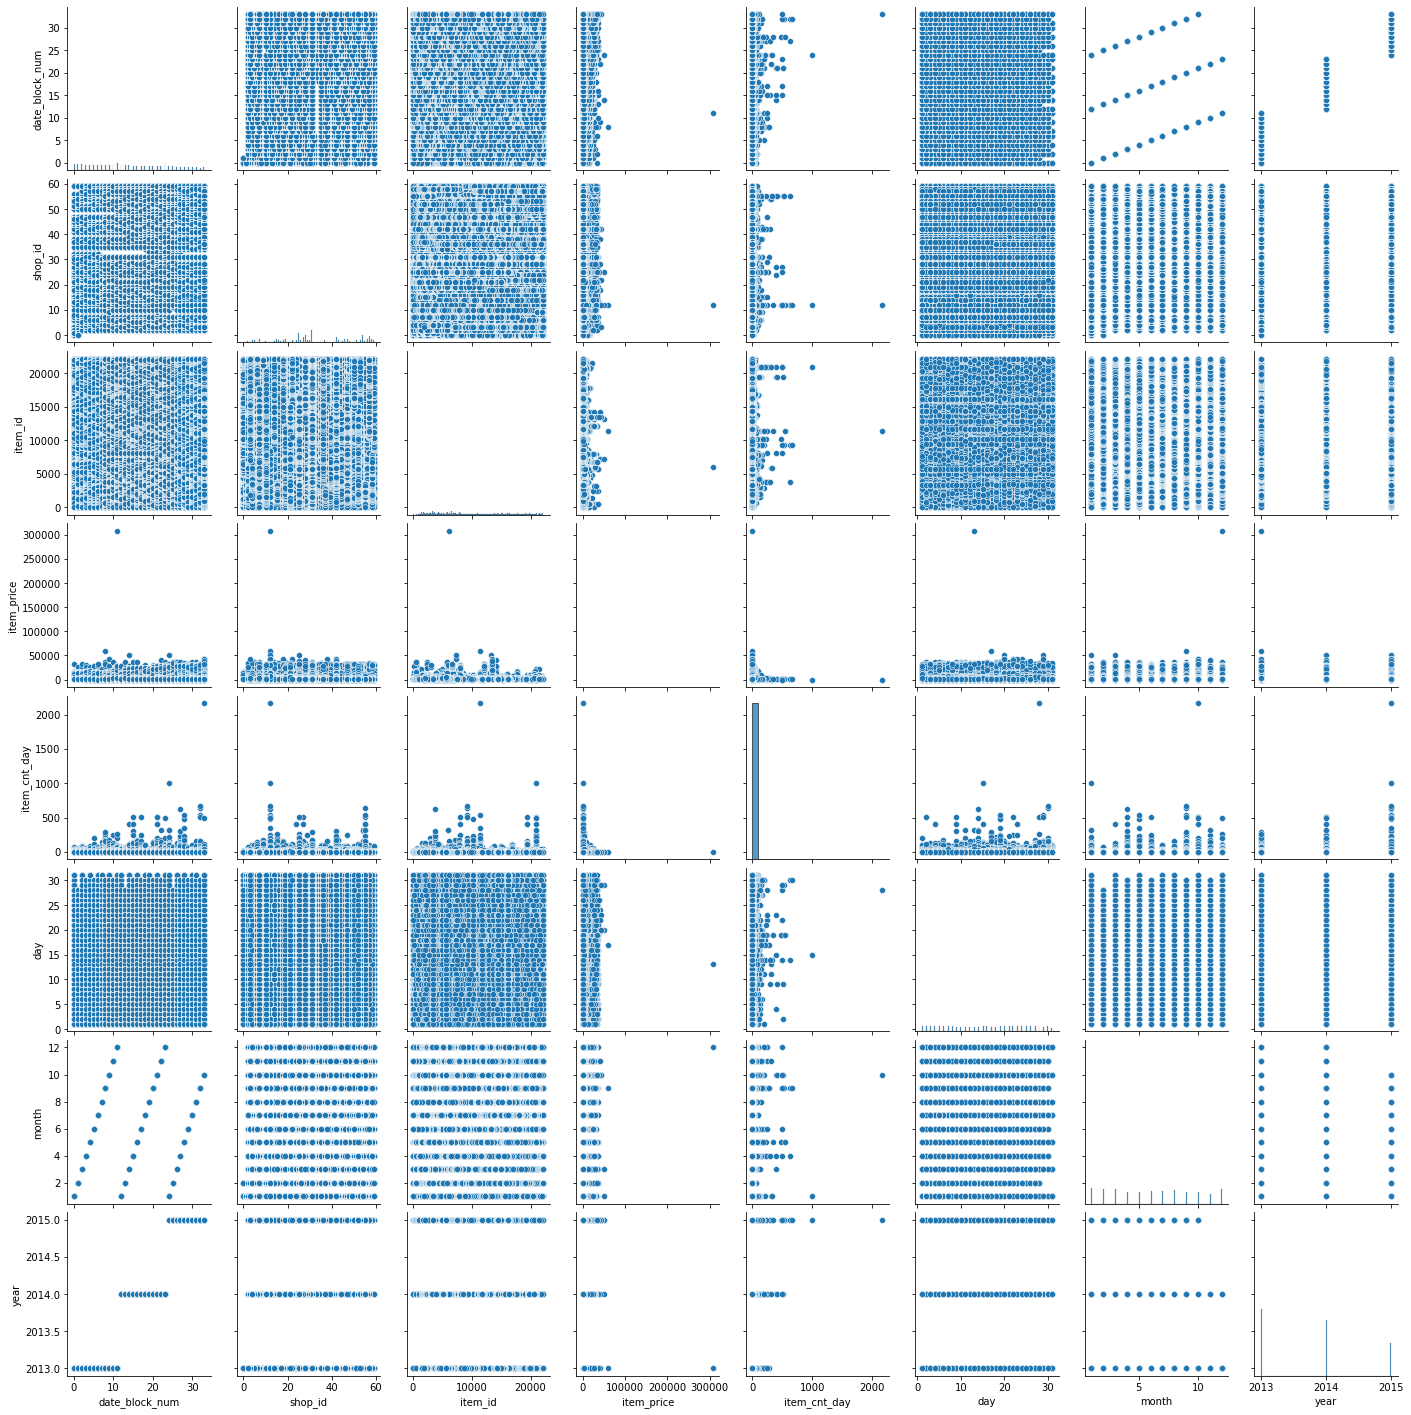

In [12]:
sns.pairplot(df);

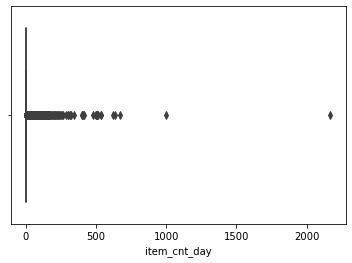

In [13]:
sns.boxplot(x='item_cnt_day',data=df);

In [14]:
#handling outliers

df=df[(df['item_cnt_day'] < 700) & (df['item_cnt_day']>0)]
df

,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
0,0,59,22154,999.00,1.0,2,1,2013
1,0,25,2552,899.00,1.0,3,1,2013
2,0,25,2552,899.00,1.0,5,1,2013
3,0,25,2554,1709.05,1.0,6,1,2013
4,0,25,2555,1099.00,1.0,15,1,2013
...,...,...,...,...,...,...,...,...
2935844,33,25,7409,299.00,1.0,10,10,2015
2935845,33,25,7460,299.00,1.0,9,10,2015
2935846,33,25,7459,349.00,1.0,14,10,2015
2935847,33,25,7440,299.00,1.0,22,10,2015


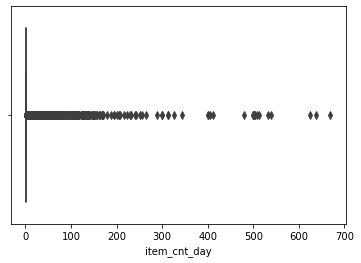

In [15]:
sns.boxplot(x='item_cnt_day',data=df);

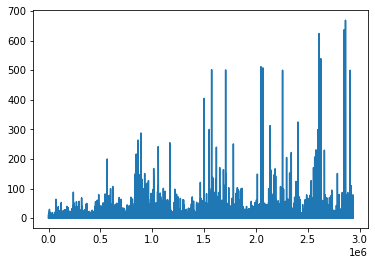

In [16]:
df.item_cnt_day.plot();

In [17]:
#Changing floating point values to int values 

df.item_cnt_day=df.item_cnt_day.astype(int)
df.item_price=df.item_price.astype(int)

C:\Users\sudhe\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


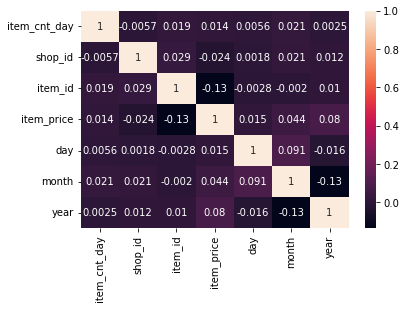

In [18]:
#lets see if there is any correlation between the values

sns.heatmap(df[["item_cnt_day","shop_id","item_id","item_price","day","month","year"]].corr(),annot=True);

In [19]:
#there is no positive correlation between item_cnt_day and other values
#Lets drop some unwanted values 

df.drop('date_block_num', axis=1, inplace=True)
df.drop('day', axis=1, inplace=True)

C:\Users\sudhe\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
df

,shop_id,item_id,item_price,item_cnt_day,month,year
0,59,22154,999,1,1,2013
1,25,2552,899,1,1,2013
2,25,2552,899,1,1,2013
3,25,2554,1709,1,1,2013
4,25,2555,1099,1,1,2013
...,...,...,...,...,...,...
2935844,25,7409,299,1,10,2015
2935845,25,7460,299,1,10,2015
2935846,25,7459,349,1,10,2015
2935847,25,7440,299,1,10,2015


In [21]:
#features
X=df.drop('item_cnt_day',axis=1).values
#target
y=df.item_cnt_day.values

#train_test data set split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [22]:
#Scale the data items using standard scalar 

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [23]:
#Fit the data into linear regression model

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred=lin_reg.predict(X_test)


In [24]:
#Testing the accuracy for the model

print("Training accuracy: ", lin_reg.score(X_train,y_train))
print("Testing accuracy: ",lin_reg.score(X_test,y_test))

Training accuracy:  0.0011131436181924803
Testing accuracy:  0.0011059102767847495


In [25]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_pred,y_test))

5.3460099216061066


In [26]:
#mean absolute error

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

0.44145312144953974
